# Online Data Science Courses

In this notebook I'm exploring the [Online Data Science Courses](https://www.kaggle.com/antonkozyriev/online-data-science-courses) dataset from Kaggle.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../data/dataframe.csv')
df

,Unnamed: 0,title,author,rating,votes_count,students_count,level,duration,platform,free
0,0,Машинное обучение и анализ данных,Moscow Institute of Physics and Technology,4.7,6382.0,100000.0,Intermediate,224.000000,Coursera,False
1,1,Introducción a la Especialización en Ciencia d...,IBM,4.6,116.0,3400.0,Beginner,48.000000,Coursera,False
2,2,Getting Started with SAS Programming,SAS,4.8,2083.0,67000.0,Beginner,22.000000,Coursera,False
3,3,Introduction to Designing Data Lakes on AWS,Amazon Web Services,4.7,65.0,6100.0,Intermediate,14.000000,Coursera,False
4,4,Estatística não-paramétrica para a tomada de d...,Universidade de São Paulo,4.4,109.0,9300.0,Intermediate,13.000000,Coursera,False
...,...,...,...,...,...,...,...,...,...,...
4678,4678,Diploma in Neural Networks in Python - Deep Le...,Start-Tech Academy,NaN,NaN,690.0,Mixed,8.000000,Alison,False
4679,4679,Data Visualization In Power BI - Master The Vi...,Ayush Kumar,0.0,0.0,219.0,Mixed,2.639167,Skillshare,True
4680,4680,Learn Power BI DAX from scratch,Muhammad Asif,4.0,3.0,93.0,Mixed,1.672778,Skillshare,True
4681,4681,Python For Beginners,Sara Al-Arab,4.0,70.0,83.0,Beginner,2.963056,Skillshare,True


Let's take a look at number of courses per platform.

In [3]:
df['platform'].value_counts()

Udemy          2072
Skillshare     1000
Coursera        996
edX             326
Pluralsight     174
FutureLearn      75
Alison           28
Stepik           12
Name: platform, dtype: int64

Counts of rating by platform.

In [3]:
df.value_counts(['platform', 'rating'])

platform     rating
Skillshare   0.0       410
Udemy        4.6       210
             4.5       189
             4.4       180
Coursera     4.6       170
                      ... 
Stepik       4.6         1
Pluralsight  2.0         1
             3.0         1
Skillshare   1.4         1
Coursera     1.9         1
Length: 105, dtype: int64

Woah! Skillshare needs to step up their game haha!

In [4]:
# df.groupby('platform').mean()['rating'].sort_values(ascending=False)
df.groupby('platform', sort=False).agg(mean_rating=pd.NamedAgg(column='rating', aggfunc='mean')).sort_values('mean_rating', ascending=False)

,mean_rating
platform,
Stepik,4.810000
Coursera,4.490303
FutureLearn,4.437143
Pluralsight,4.366279
Udemy,3.968436
Skillshare,1.913900
edX,NaN
Alison,NaN


<BarContainer object of 8 artists>

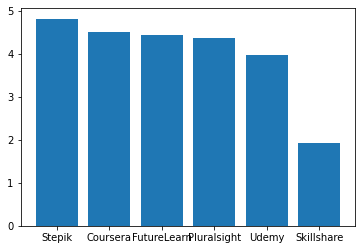

In [5]:
avg_rating_by_platform = df.groupby('platform', sort=False).agg(mean_rating=pd.NamedAgg(column='rating', aggfunc='mean')).sort_values('mean_rating', ascending=False)

plt.bar(avg_rating_by_platform.index, avg_rating_by_platform['mean_rating'])

In [6]:
print(f"Number of Authors: {len(df['author'].unique())}")

Number of Authors: 1566


In [7]:
df.groupby('author').agg(avg_rating_by_author=pd.NamedAgg(column='rating', aggfunc='mean')).sort_values('avg_rating_by_author', ascending=False)

,avg_rating_by_author
author,
Stepik Academy,5.0
Adith Sreeram,5.0
Charles Santana,5.0
Mirco Baragiani,5.0
Sandro Servino,5.0
...,...
Wharton,NaN
WitsX,NaN
Workforce Academy Partnership,NaN


In [8]:
df.groupby(['author', 'platform']).agg(avg_rating_by_author_platform=pd.NamedAgg(column='rating', aggfunc='mean')).sort_values('avg_rating_by_author_platform', ascending=False)

,,avg_rating_by_author_platform
author,platform,
Michael Bunting,Udemy,5.0
Vishwesh Singh,Udemy,5.0
Chris Achard,Pluralsight,5.0
Charles Santana,Udemy,5.0
Mirco Baragiani,Udemy,5.0
...,...,...
Wharton,edX,NaN
WitsX,edX,NaN
Workforce Academy Partnership,Alison,NaN


In [9]:
pd.pivot_table(df, values='students_count', index='level', aggfunc='sum').sort_values('students_count', ascending=False)

,students_count
level,
Beginner,26706424.0
Mixed,21729047.0
Intermediate,16279662.0
Advanced,3926403.0


While we can't know for sure that each student count is a unique student as one student may take several courses, we can approximate the proportion of students who have taken courses at each level.  It is unlikely that students have taken more than one course at a time. The aggregation would also be 'all of time' so it might not be very insightful.  If we had a time element, we could look at how number of students at the level over time. Alas, we'll do what we can with the data available.

In [18]:
total_students = df['students_count'].sum()
print(f"There are {total_students:,.0f} total students in the dataset")

There are 68,641,536 total students in the dataset


In [38]:
proportion_students_level = pd.pivot_table(df, values='students_count', index='level', aggfunc='sum').sort_values('students_count', ascending=False)/total_students
proportion_students_level.rename({'students_count': 'proportion_students_level'}, axis=1, inplace=True)
proportion_students_level

,proportion_students_level
level,
Beginner,0.389071
Mixed,0.316558
Intermediate,0.237169
Advanced,0.057202


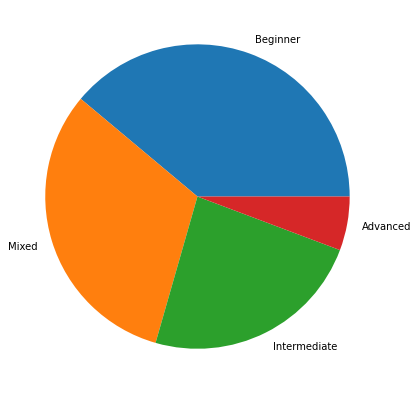

In [10]:
pie_data = pd.pivot_table(df, values='students_count', index='level', aggfunc='sum').sort_values('students_count', ascending=False)
fig = plt.figure(figsize =(10, 7))
plt.pie(pie_data['students_count'], labels=pie_data.index);

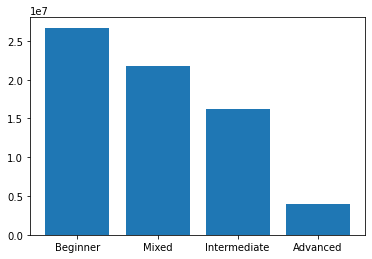

In [11]:
plt.bar(pie_data.index, pie_data['students_count']);

It's clear that there are more Beginner and Mixed level students.  But are there more Beginner and Mixed level courses?  Let's find out.

In [23]:
df.groupby('level').size().sort_values(ascending=False)

level
Beginner        1772
Mixed           1521
Intermediate    1136
Advanced         254
dtype: int64

Yes, there are more Beginner and Mixed level classes as well.  Let's look at proportions and see if they're in line with the number of students enrolled.

In [26]:
total_classes = len(df['title'].unique())
print(f"There are {total_classes:,} courses in this dataset.")

There are 4,593 courses in this dataset.


In [42]:
proportion_classes = df.groupby('level').size().sort_values(ascending=False) / total_classes
proportion_classes.rename('proportion_classes', axis=1, inplace=True)
proportion_classes


level
Beginner        0.385804
Mixed           0.331156
Intermediate    0.247333
Advanced        0.055302
Name: proportion_classes, dtype: float64

In [44]:
pd.merge(proportion_classes, proportion_students_level, left_index=True, right_index=True)

,proportion_classes,proportion_students_level
level,,
Beginner,0.385804,0.389071
Mixed,0.331156,0.316558
Intermediate,0.247333,0.237169
Advanced,0.055302,0.057202


So we can see the proportion of classes by level and proportion of students by level is nearly identical.  Not surprising then more students enroll in Beginner and Mixed level courses if there are more of those offered.  Likely these platforms cater to those starting out in data science than those who are already proficient and want to hone their skills.

In [12]:
pd.pivot_table(df, values=['students_count', 'rating'], index='level', aggfunc={'students_count': 'sum', 'rating': 'mean'}).sort_values(['students_count', 'rating'], ascending=False)

,rating,students_count
level,,
Beginner,3.362943,26706424.0
Mixed,3.598960,21729047.0
Intermediate,3.862683,16279662.0
Advanced,3.875000,3926403.0


In [10]:
pd.pivot_table(df, index=['title', 'platform'], values=['rating', 'students_count'], aggfunc={'rating': 'mean', 'students_count': 'sum'}).sort_values(['rating', 'students_count'], ascending=False)

,,rating,students_count
title,platform,,
Generate and visualize data in Python and MATLAB,Udemy,5.0,19595.0
Want to be a Big Data Scientist?,Udemy,5.0,12523.0
Population Health: Predictive Analytics,Coursera,5.0,2700.0
Introduction to Predictive Modeling,Coursera,5.0,1700.0
Network Analytics for Business,Coursera,5.0,1700.0
...,...,...,...
أساسيات تحليل البيانات باستخدام بايثون وباندا,Coursera,NaN,0.0
التعلّم الآلي باستخدام لغة بايثون,Coursera,NaN,0.0
人群与网络 | Networks and Crowds,edX,NaN,0.0


In [11]:
df[['title', 'platform', 'rating', 'students_count']].sort_values(['rating', 'students_count'], ascending=False)

,title,platform,rating,students_count
345,Generate and visualize data in Python and MATLAB,Udemy,5.0,19595.0
240,Want to be a Big Data Scientist?,Udemy,5.0,12523.0
3899,Population Health: Predictive Analytics,Coursera,5.0,2700.0
2756,Introduction to Predictive Modeling,Coursera,5.0,1700.0
3580,Network Analytics for Business,Coursera,5.0,1700.0
...,...,...,...,...
4611,Design Data Models for Couchbase,Pluralsight,NaN,NaN
4620,K-Means Clustering : World Happiness Report,Coursera,NaN,NaN
4640,Take Your Medicine: Developing New Drug Products,edX,NaN,NaN
4652,Build Your First Data Visualization with CanvasJS,Pluralsight,NaN,NaN


<BarContainer object of 39 artists>

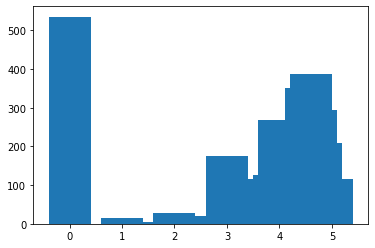

In [18]:
plt.bar(df.value_counts('rating').index, df.value_counts('rating'))

The only other real question I can think to ask of this data is what types of topics are represented in the dataset.  To find the answer to that question, we'll need to do some NLP which isn't exactly what I set out for on this particular exploration.  Alas, all roads lead to NLP.  The first major issue is going to be splitting out those course titles that are in English as I won't be able to properly gauge model performance on titles I can't read. Lucky for us, SpaCy has a language detector.  Let's try that out.

Reference: https://towardsdatascience.com/4-python-libraries-to-detect-english-and-non-english-language-c82ad3efd430

conda install -c conda-forge spacy
pip install spacy-langdetect
conda install -c conda-forge langdetect # not this!

In [47]:
from spacy_langdetect import LanguageDetector
import spacy

In [53]:
# https://spacy.io/usage/models
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 3.9 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [54]:
nlp = spacy.load('en_core_web_sm') # spacy.load('en_core_web_sm')  # 1
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True) #2
text_content = df.iloc[0, 1]
doc = nlp(text_content) #3
detect_language = doc._.language #4
print(detect_language)

ValueError: [E966] `nlp.add_pipe` now takes the string name of the registered component factory, not a callable component. Expected string, but got <spacy_langdetect.spacy_langdetect.LanguageDetector object at 0x7facba060460> (name: 'language_detector').

- If you created your component with `nlp.create_pipe('name')`: remove nlp.create_pipe and call `nlp.add_pipe('name')` instead.

- If you passed in a component like `TextCategorizer()`: call `nlp.add_pipe` with the string name instead, e.g. `nlp.add_pipe('textcat')`.

- If you're using a custom component: Add the decorator `@Language.component` (for function components) or `@Language.factory` (for class components / factories) to your custom component and assign it a name, e.g. `@Language.component('your_name')`. You can then run `nlp.add_pipe('your_name')` to add it to the pipeline.

In [49]:
df.iloc[0, 1]

'Машинное обучение и анализ данных'

In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [59]:
# Reference: https://stackoverflow.com/questions/66712753/how-to-use-languagedetector-from-spacy-langdetect-package
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

def get_lang_detector(nlp, name):
    return LanguageDetector()

nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)
text = 'This is an english text.'
doc = nlp(text)
print(doc._.language)

ValueError: [E004] Can't set up pipeline component: a factory for 'language_detector' already exists. Existing factory: <function get_lang_detector at 0x7fac985edc10>. New factory: <function get_lang_detector at 0x7facba3cd4c0>

In [61]:
doc = nlp(df.iloc[0, 1])
print(doc._.language)

{'language': 'ru', 'score': 0.9999981426731537}


Cool, we could just label all the titles according to this language predictor and then filter on language.

In [62]:
doc._.language['language']

'ru'

In [63]:
lang_df = df.copy()
lang_df

,Unnamed: 0,title,author,rating,votes_count,students_count,level,duration,platform,free
0,0,Машинное обучение и анализ данных,Moscow Institute of Physics and Technology,4.7,6382.0,100000.0,Intermediate,224.000000,Coursera,False
1,1,Introducción a la Especialización en Ciencia d...,IBM,4.6,116.0,3400.0,Beginner,48.000000,Coursera,False
2,2,Getting Started with SAS Programming,SAS,4.8,2083.0,67000.0,Beginner,22.000000,Coursera,False
3,3,Introduction to Designing Data Lakes on AWS,Amazon Web Services,4.7,65.0,6100.0,Intermediate,14.000000,Coursera,False
4,4,Estatística não-paramétrica para a tomada de d...,Universidade de São Paulo,4.4,109.0,9300.0,Intermediate,13.000000,Coursera,False
...,...,...,...,...,...,...,...,...,...,...
4678,4678,Diploma in Neural Networks in Python - Deep Le...,Start-Tech Academy,NaN,NaN,690.0,Mixed,8.000000,Alison,False
4679,4679,Data Visualization In Power BI - Master The Vi...,Ayush Kumar,0.0,0.0,219.0,Mixed,2.639167,Skillshare,True
4680,4680,Learn Power BI DAX from scratch,Muhammad Asif,4.0,3.0,93.0,Mixed,1.672778,Skillshare,True
4681,4681,Python For Beginners,Sara Al-Arab,4.0,70.0,83.0,Beginner,2.963056,Skillshare,True


In [64]:
lang_df['language'] = lang_df['title'].apply(lambda x: nlp(x)._.language['language'])
lang_df

,Unnamed: 0,title,author,rating,votes_count,students_count,level,duration,platform,free,language
0,0,Машинное обучение и анализ данных,Moscow Institute of Physics and Technology,4.7,6382.0,100000.0,Intermediate,224.000000,Coursera,False,ru
1,1,Introducción a la Especialización en Ciencia d...,IBM,4.6,116.0,3400.0,Beginner,48.000000,Coursera,False,es
2,2,Getting Started with SAS Programming,SAS,4.8,2083.0,67000.0,Beginner,22.000000,Coursera,False,en
3,3,Introduction to Designing Data Lakes on AWS,Amazon Web Services,4.7,65.0,6100.0,Intermediate,14.000000,Coursera,False,en
4,4,Estatística não-paramétrica para a tomada de d...,Universidade de São Paulo,4.4,109.0,9300.0,Intermediate,13.000000,Coursera,False,pt
...,...,...,...,...,...,...,...,...,...,...,...
4678,4678,Diploma in Neural Networks in Python - Deep Le...,Start-Tech Academy,NaN,NaN,690.0,Mixed,8.000000,Alison,False,en
4679,4679,Data Visualization In Power BI - Master The Vi...,Ayush Kumar,0.0,0.0,219.0,Mixed,2.639167,Skillshare,True,en
4680,4680,Learn Power BI DAX from scratch,Muhammad Asif,4.0,3.0,93.0,Mixed,1.672778,Skillshare,True,en
4681,4681,Python For Beginners,Sara Al-Arab,4.0,70.0,83.0,Beginner,2.963056,Skillshare,True,de


In [65]:
lang_df[['title', 'language']]

,title,language
0,Машинное обучение и анализ данных,ru
1,Introducción a la Especialización en Ciencia d...,es
2,Getting Started with SAS Programming,en
3,Introduction to Designing Data Lakes on AWS,en
4,Estatística não-paramétrica para a tomada de d...,pt
...,...,...
4678,Diploma in Neural Networks in Python - Deep Le...,en
4679,Data Visualization In Power BI - Master The Vi...,en
4680,Learn Power BI DAX from scratch,en
4681,Python For Beginners,de


This performance of language tagging is surprisingly good.  The one thing I'm noticing is the abundance of English titles that have the language tag 'tl'.  I did a little research and this either means 'target language' or 'tagalog'.  I'm going to do more research to see if I can pinpoint which language this is being tagged as.

In [66]:
lang_df[lang_df['language'] == 'tl']

,Unnamed: 0,title,author,rating,votes_count,students_count,level,duration,platform,free,language
7,7,Exploratory Data Analysis,Coursera Project Network,4.3,124.0,5100.0,Intermediate,NaN,Coursera,False,tl
18,18,Pygal: Python Data Playbook,Kishan Iyer,3.5,17.0,NaN,Beginner,3.000000,Pluralsight,False,tl
30,30,UX Data Analysis,HECMontrealX,NaN,NaN,NaN,Intermediate,24.000000,edX,True,tl
37,37,Data Wrangling with Python,Packt Publishing,3.4,13.0,62.0,Beginner,3.500000,Udemy,False,tl
264,264,Data Mining,The Art Of Service,3.3,85.0,620.0,Mixed,2.000000,Udemy,False,tl
299,299,Analyzing Multivariate Data Using R,Marina Varfolomeeva,NaN,NaN,42.0,Intermediate,NaN,Stepik,True,tl
307,307,Analysing Tweets using R,Partha Majumdar,5.0,1.0,19.0,Intermediate,3.000000,Udemy,False,tl
357,357,Google Data Analytics,Google,4.8,28287.0,490000.0,Beginner,240.000000,Coursera,False,tl
379,379,Searching and Manipulating Data in Excel,Pratheerth Padman,4.5,60.0,NaN,Beginner,1.200000,Pluralsight,False,tl
464,464,ADVANCED ARDUINO,Ahmad Halawi,4.0,12.0,42.0,Advanced,3.280833,Skillshare,True,tl


All of the titles tagged with 'tl' are in English.  I'm going to just change those tags to 'en'

In [69]:
lang_df['language'].replace({'tl': 'en'}, inplace=True)

In [72]:
lang_df[lang_df['language'] != 'en'][['title', 'language']]

,title,language
0,Машинное обучение и анализ данных,ru
1,Introducción a la Especialización en Ciencia d...,es
4,Estatística não-paramétrica para a tomada de d...,pt
9,Herramientas para el Análisis de Big Data,es
11,赵强老师：BigData 电商大数据项目实战(Hadoop+Spark)系列课程（）,no
...,...,...
4669,Python自动化办公+数据爬虫+可视化Web站点,vi
4670,"Visualização de Dados e com Python, Matplotlib...",pt
4671,Power BI - Primeiros passos aos primeiros Dash...,pt
4675,R Programming : Hands on R Programming for Beg...,da


Strangely, Italian seems to be another mislabeled language in the dataset.

In [73]:
lang_df[lang_df['language'] == 'it']

,Unnamed: 0,title,author,rating,votes_count,students_count,level,duration,platform,free,language
25,25,"Gestione amministrazione, controllo di gestion...",Riccardo Dominici,0.0,0.0,3.0,Mixed,7.702500,Skillshare,True,it
40,40,Data Science: Bitcoin Data Visualization & Pri...,School of Disruptive Innovation,3.9,51.0,6760.0,Beginner,1.500000,Udemy,False,it
144,144,Excel Data Visualization Part : Advanced Demos,Chris Dutton,3.7,63.0,760.0,Advanced,2.096667,Skillshare,True,it
177,177,Designing data-intensive applications,Universidad Nacional Autónoma de México,4.5,30.0,5900.0,Intermediate,NaN,Coursera,False,it
207,207,Data Visualization e manipolazione dei dati co...,FedericaX,NaN,NaN,NaN,Intermediate,20.000000,edX,True,it
...,...,...,...,...,...,...,...,...,...,...,...
4460,4460,Pro data science in Python,Francisco Juretig,3.9,37.0,495.0,Intermediate,11.500000,Udemy,False,it
4527,4527,Data Integration Guide,Ahmed Fessi,5.0,11.0,95.0,Intermediate,2.000000,Udemy,False,it
4606,4606,Pro data science in R,Francisco Juretig,3.6,25.0,246.0,Mixed,18.500000,Udemy,False,it
4619,4619,Data Literacy,Johns Hopkins University,4.6,105.0,4500.0,Beginner,60.000000,Coursera,False,it


Some of these are just plain wrong.  I'm not sure at this point whether I can rely on this method to automatically assign languages to titles.  These titles with Italian labels seem too mixed a bag to really rely on this method.  I might need to add the author name to the prediction but even then, I'm not sure that would yield better results and may present bias. After all, plenty of people speak English who don't have "English" names. As I was writing this, it dawned on me that I didn't do any text preprocessing like removing punctuation and removing capital letters etc.  I'll try that next and see if results improve.

conda install -c conda-forge textblob

In [74]:
from textblob import TextBlob
text = "это компьютерный портал для гиков. It was a beautiful day ."
lang = TextBlob(text)
print(lang.detect_language())

HTTPError: HTTP Error 404: Not Found

In [ ]:
# Change code in:
# /opt/anaconda3/lib/python3.9/site-packages/textblob/translate.py
# Code change found at: https://github.com/sloria/TextBlob/commit/c2ad49f292b58133a87af0e38ee4cdbc0655378b

In [1]:
from textblob import TextBlob
text = "это компьютерный портал для гиков. It was a beautiful day ."
lang = TextBlob(text)
print(lang.detect_language())

HTTPError: HTTP Error 400: Bad Request

Welllll dang it.  That didn't work. Going to restart the kernel and see if that helps?